# EOR DATA ANALYSER

Parameters to be entered: Nca0, Soi, uw, sigma1, viscw, visco swir


Nca0= Capillary number at start of EOR  

Soi= Residual oil saturation at the start of EOR

uw=  Superficial  velocity of water (m/s)

sigma1= IFT after EOR (N/m)

viscw= Viscosity of water (displacing fluid) (Ns/m^2)

visco= Viscosity of oil (displaced fluid) (Ns/m^2)

swir= Irreducible water saturation


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from math import *



print("Enter the number of reservoirs' data available:")
n=int(input())
print("Enter the visco values in order:\n")
visco=[float(i) for i in input().split()]


print("Enter the Nca0 values in order:\n")
Nca0=[float(i) for i in input().split()]
print("Enter the Soi values in order:\n")
Soi=[float(i) for i in input().split()]
print("Enter the uw values in order:\n")
uw=[float(i) for i in input().split()]
print("Enter the sigma1 values in order:\n")
sigma1=[float(i) for i in input().split()]
print("Enter the viscw values in order:\n")
viscw=[float(i) for i in input().split()]
print("Enter the swir values in order:\n")
swir=[float(i) for i in input().split()]


data=[Nca0, Soi, uw, sigma1, viscw, swir]

print(data)

Enter the number of reservoirs' data available:
4
Enter the visco values in order:

0.005 0.005 0.005 0.005 0.005
Enter the Nca0 values in order:

0.000001 0.000001 0.000001 0.000001
Enter the Soi values in order:

0.5 0.5 0.5 0.5
Enter the uw values in order:

0.000006 0.00006 0.00006 0.000006
Enter the sigma1 values in order:

0.0005 0.0006 0.0005 0.0006
Enter the viscw values in order:

0.001 0.001 0.001 0.001
Enter the swir values in order:

0.2 0.2 0.2 0.2
[[1e-06, 1e-06, 1e-06, 1e-06], [0.5, 0.5, 0.5, 0.5], [6e-06, 6e-05, 6e-05, 6e-06], [0.0005, 0.0006, 0.0005, 0.0006], [0.001, 0.001, 0.001, 0.001], [0.2, 0.2, 0.2, 0.2]]


# Defining functions for calculating EOR screening parameters

Sor=  Residual oil saturation after EOR application

Nca0= #Capillary number at start of EOR

Nca1=  #Capillary number after EOR end

Soi=   #Residual oil saturation at the start of EOR

uw=    #Superficial  velocity of water

sigma1=   #IFT after EOR 

Swir=    #Irreducible water saturation

Kr0 =    (1-Sw1)^2 * (1-(Sw1)^((2+t)/t))

Krw =    (Sw1)^((2+3t)/t)

Sor= [-tanh(v1*Nca1-v3)+1+v2]*Soi/[-tanh((v1*Nca0-v3)+1+v2)]

fw = 1/(1+((Kro*Muw)/(Muo*Krw)))

Sw1 = (Sw-Swir)/(1-Sor-Swir)


t=3.7
v1=6500, v2= 0.1, v3=0

In [ ]:
print(data)
def Nca1cal(a,b,c): #a=uw, b=viscw, c=sigma1 
    Nca1=(a*b)/c
    return Nca1
    
def Sorcal(a,b,c): #a=Nca1, b=Nca0, c=Soi
    Sor= c*(1.1-tanh(6500*a))/(1.1-tanh((6500*b))) 
    return Sor

def Edcal(a,b):  #a=Soi, b=Sor
    Ed=(a-b)/a
    return Ed

def Sw1cal(a,b,c):
    Sw1=(a-b)/(1-c-b)  #a=Sw, b=Swir, C=Sor
    return Sw1
    
def Krwcal(a):   #a=Sw1
    krw=a**(3.540541)
    return krw    

def Krocal(a): #a=Sw1
    Kro=((1-a)**2)*(1-(a)**1.540541)
    return Kro
    
def fwcal(a,b,c,d):    #a=kr0, b=viscw, c=visco, d=krw
    fw= 1/(1+(a*b/(c*d)))
    return fw

[[1e-06, 1e-06, 1e-06, 1e-06], [0.5, 0.5, 0.5, 0.5], [6e-06, 6e-05, 6e-05, 6e-06], [0.0005, 0.0006, 0.0005, 0.0006], [0.001, 0.001, 0.001, 0.001], [0.2, 0.2, 0.2, 0.2]]


In [ ]:
#data[0]=Nca0; [1]=Soi; [2]= uw; [3]= sigma1; [4]=viscw; [5]=swir

Nca1=[]

print(len(data))
for i in range(len(Nca0)):
        Nca1.append(Nca1cal(data[2][i],data[4][i],data[3][i]))   #a=uw, b=viscw, c=sigma1
print(Nca1) 

Sor=[]
for i in range(len(Nca0)):
        Sor.append(Sorcal(Nca1[i],data[0][i],data[1][i]))       #a=Nca1 #b=Nca0 #c=Soi
print(Sor)

Ed=[]
for i in range(len(Nca0)):
        Ed.append(Edcal(data[1][i],Sor[i]))
print(Ed)

6
[1.2e-05, 0.00010000000000000002, 0.00012000000000000002, 1e-05]
[0.4673789274902714, 0.24157749871367923, 0.20452366556642362, 0.4732927757543704]
[0.06524214501945724, 0.5168450025726415, 0.5909526688671527, 0.0534144484912592]


In [ ]:

MaxEd=Ed.index(max(Ed))
print(MaxEd+1)
print("Above numbered reservoir acheived the maximum Ed of %f\n"%(max(Ed)))

MinEd=Ed.index(min(Ed))
print(MinEd+1)
print("Above numbered reservoir acheived the minimum Ed of %f\n"%(min(Ed)))

MinSor=Sor.index(min(Sor))
print(MinSor+1)
print("Above numbered reservoir shows the minimum Sor of %f indicating max recovery\n"%(min(Sor)))

MaxSor=Sor.index(max(Sor))
print(MaxSor+1)
print("Above numbered reservoir shows the maximum Sor of %f indicating min recovery\n"%(max(Sor)))



ChangeNca=[]
for i in range(len(Nca0)):
    ChangeNca.append(Nca1[i]-Nca0[i])
 

MaxNcaChange=ChangeNca.index(max(ChangeNca))
print(MaxNcaChange+1)
print("Above numbered reservoir shows the Maximum improvement in capillary no of %f"%(max(ChangeNca)))


MinNcaChange=ChangeNca.index(min(ChangeNca))
print(MinNcaChange+1)
print("Above numbered reservoir shows the Minimum improvement in capillary no of %f"%(min(ChangeNca)))

3
Above numbered reservoir acheived the maximum Ed of 0.590953

4
Above numbered reservoir acheived the minimum Ed of 0.053414

3
Above numbered reservoir shows the minimum Sor of 0.204524 indicating max recovery

4
Above numbered reservoir shows the maximum Sor of 0.473293 indicating min recovery

3
Above numbered reservoir shows the Maximum improvement in capillary no of 0.000119
4
Above numbered reservoir shows the Minimum improvement in capillary no of 0.000009


In [ ]:
#Plotting Fractional flow curves for Reservoir with Max oil recovery

In [ ]:
Sw=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
Sw1=[]
for i in range(len(Sw)):
        Sw1.append(Sw1cal(Sw[i],data[5][MinSor],Sor[MinSor]))   
print(Sw1)
Sw11=[x for x in Sw1 if x >0 and x<1]
print(Sw11)
Sw01=[]
for i in range(len(Sw)):
  if Sw1[i]>0 and Sw1[i]<1:
    Sw01.append(Sw[i])
print(Sw01)

[-0.335865572542429, -0.25189917940682177, -0.1679327862712145, -0.08396639313560726, 0.0, 0.08396639313560722, 0.16793278627121444, 0.25189917940682166, 0.335865572542429, 0.4198319656780362, 0.5037983588136434, 0.5877647519492507, 0.6717311450848579, 0.7556975382204651, 0.8396639313560723, 0.9236303244916797, 1.007596717627287, 1.091563110762894, 1.1755295038985012, 1.2594958970341086, 1.343462290169716]
[0.08396639313560722, 0.16793278627121444, 0.25189917940682166, 0.335865572542429, 0.4198319656780362, 0.5037983588136434, 0.5877647519492507, 0.6717311450848579, 0.7556975382204651, 0.8396639313560723, 0.9236303244916797]
[0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]


In [ ]:
Kro=[]
for i in range(len(Sw11)):
        Kro.append(Krocal(Sw11[i]))   #a=Sw1
print(Kro)

[0.8206519774726604, 0.6480151821564767, 0.4927456858622801, 0.35893533242958175, 0.2481974545474679, 0.16058512975752454, 0.09499356062427161, 0.049382749208227134, 0.020918155841125136, 0.006067547006304926, 0.0006718434400675377]


In [ ]:
Krw=[]
for i in range(len(Sw11)):
        Krw.append(Krwcal(Sw11[i]))   #a=uw, b=viscw, c=sigma1
print(Krw) 

[0.0001551498657172267, 0.0018053459910643923, 0.007586103582041558, 0.02100726373423081, 0.046289592987389404, 0.08827298448713584, 0.15235463242814018, 0.24444352040206124, 0.3709250233084409, 0.5386323136115159, 0.7548226141191394]


In [ ]:
fw=[]
for i in range(len(Sw11)):
        fw.append(fwcal(Kro[i],viscw[MinSor],visco[MinSor],Krw[i]))   
print(fw) 

[0.000944391458037348, 0.013738438581960694, 0.07147582205602232, 0.22638520785044466, 0.48253971691366787, 0.7332251585120179, 0.8891255249530388, 0.9611648823776234, 0.9888468817813285, 0.9977521185688005, 0.9998220180870255]


In [ ]:
import numpy as np
from scipy.optimize import*
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from tkinter import*
from tkinter import ttk
import pandas as pd

In [ ]:
SW = np.array(Sw01)
SW_table = pd.DataFrame(SW, columns = ['SW'])
KRW = np.array(Krw)
KRO = np.array(Kro)
VISW = viscw[MinSor] 
VISO = visco[MinSor] 
# Initial water saturation
SWI = Sw01[0]
# Calculating the coefficient b
b = (np.log((KRO/KRW)[2])-np.log((KRO/KRW)[3]))/(SW[3]-SW[2])
# Calculating the coefficient a
a = (KRO/KRW)[2]*math.exp(b*SW[2])

In [ ]:
# Calculating the fractional flow
def fw(SW):
    fw = 1/(1+a*(VISW/VISO)*np.exp(-b*SW))
    return(fw)
''' To calculate a suitable slope for the tangent to the fractional flow curve
Drawn from the initial water saturation'''
''' STEP1: Generate a list of uniformly distributed random numbers from a water saturation
# greater than the initial water saturation to 1'''
xList = []
for i in range(0, 10000):
    x = random.uniform(SWI+0.1, 1)
    xList.append(x) 
xs = np.array(xList)
'''STEP2: Calculate different slopes of tangents or lines intersecting the fractional
flow curve using the array generated in step 1 as the water saturation.'''
m = 1/((xs-SWI)*(1+(VISW/VISO)*a*np.exp(-b*xs)))
'''STEP3: Calculate the maximum slope from different slopes generated in step 2.
 The value of this slope will be the slope of the tangent to the fractional flow
 curve.'''
tangent_slope=max(m)

In [ ]:
# Calculate the breakthrough saturation.
Saturation_at_Breakthrough = SWI + 1/tangent_slope
# Calculating the saturation at the flood front
def funct(SWF):
    swf = SWF[0]
    F = np.empty((1))
    F[0] = ((tangent_slope*(swf-SWI)*(1+(VISW/VISO)*a*math.exp(-b*swf)))-1)
    return F
SWF_Guess = np.array([SWI+0.1])
SWF = fsolve(funct, SWF_Guess)[0]
# Fractional flow at the flood front
Fwf = fw(SWF)
# Fractional flow
Fw = fw(SW)

In [ ]:
tangent = (SW-SWI)*tangent_slope

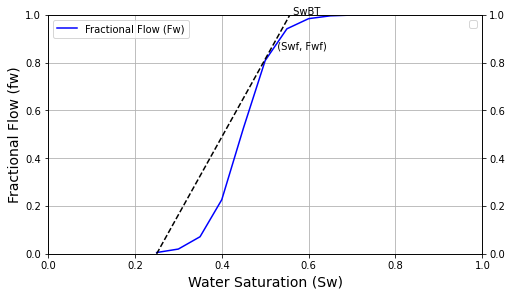

In [ ]:
# Making the plots
fig, ax = plt.subplots(constrained_layout=True)
fig.set_figheight(4)
fig.set_figwidth(7)
fractional_flow_curve = ax.plot(SW, fw(SW), 'b', label = 'Fractional Flow (Fw)')
tangent_curve = ax.plot(SW, tangent, 'k--')
ax.set_ylabel("Fractional Flow (fw)",fontsize=14)
ax.set_xlabel("Water Saturation (Sw)",fontsize=14)
ax.set_ylim([0,1])
ax.set_xlim([0,1])
# twin object for two different y-axis on the same plot
ax2=ax.twinx()
ax.grid(True)
ax2.legend()
ax.legend(loc='upper left')
ax.annotate("  (Swf, Fwf)", (SWF, Fwf))
ax.annotate(" SwBT", (Saturation_at_Breakthrough, 1))
plt.show()